# K-Means Replicate from Sratch
* source ML from Sentdex Pt. 37-38

In [53]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans

In [54]:
X = np.array([[1, 2],[1.5, 1.8],[5, 8],[8, 8],[1, 0.6],[9, 11]])
X

array([[ 1. ,  2. ],
       [ 1.5,  1.8],
       [ 5. ,  8. ],
       [ 8. ,  8. ],
       [ 1. ,  0.6],
       [ 9. , 11. ]])

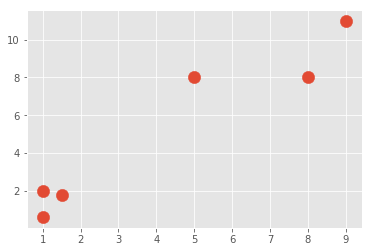

In [56]:
plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

In [241]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
    
    def fit(self, data):
        self.centroids = {}
        
        for i in range(self.k):
            self.centroids[i] = data[i] #choose first two as controids
        print("controids: ", i, self.centroids)
        for i in range(self.max_iter):
            self.classifications = {}
            
            for i in range(self.k):
                self.classifications[i] = []
            print("--------classification: ", self.classifications)
            
            for featureset in data:
#                 for centroid in self.centroids:
#                     print("---------", self.centroids[centroid])
                
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                print(featureset, self.centroids)
                print(distances, min(distances))
                classification = distances.index(min(distances))
                print(classification)
                self.classifications[classification].append(featureset)
                print("classification------: ", self.classifications)
            
            #following code is shallow copy even sentdex mention it as deep copy
            #https://stackoverflow.com/questions/3975376/understanding-dict-copy-shallow-or-deep
            #do not know why it works
            prev_centroids = dict(self.centroids)
            
            for classification in self.classifications:
                # This is magic line, improve avaergae for every iteration
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
                print("avarage out", self.centroids[classification])
            
            optimized = True
            
            #test tolerence, 
            #ABS is needed(see the print output),poisitive diff [0] + degative diff [1] make no sence
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                print("compare last centroid with current centroid: ",current_centroid,original_centroid)
                if np.sum(abs((current_centroid-original_centroid))/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0)) # without ABS
                    optimized = False
            
            if optimized:
                break
            
            print("-----------------------END OF ONE INTERATION(<max_iter)-------------------------")

            
            
    
    def predict(self, data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        print(data, self.centroids)
        #print(distances, min(distances))
        classification = distances.index(min(distances))
        return classification

In [242]:
aaa = K_Means(2,0.001,20)#k=2,tol=0.001,max_iter=10)
aaa.fit(data=X)

controids:  1 {0: array([1., 2.]), 1: array([1.5, 1.8])}
--------classification:  {0: [], 1: []}
[1. 2.] {0: array([1., 2.]), 1: array([1.5, 1.8])}
[0.0, 0.5385164807134504] 0.0
0
classification------:  {0: [array([1., 2.])], 1: []}
[1.5 1.8] {0: array([1., 2.]), 1: array([1.5, 1.8])}
[0.5385164807134504, 0.0] 0.0
1
classification------:  {0: [array([1., 2.])], 1: [array([1.5, 1.8])]}
[5. 8.] {0: array([1., 2.]), 1: array([1.5, 1.8])}
[7.211102550927978, 7.119691004531026] 7.119691004531026
1
classification------:  {0: [array([1., 2.])], 1: [array([1.5, 1.8]), array([5., 8.])]}
[8. 8.] {0: array([1., 2.]), 1: array([1.5, 1.8])}
[9.219544457292887, 8.98276126811795] 8.98276126811795
1
classification------:  {0: [array([1., 2.])], 1: [array([1.5, 1.8]), array([5., 8.]), array([8., 8.])]}
[1.  0.6] {0: array([1., 2.]), 1: array([1.5, 1.8])}
[1.4, 1.3] 1.3
1
classification------:  {0: [array([1., 2.])], 1: [array([1.5, 1.8]), array([5., 8.]), array([8., 8.]), array([1. , 0.6])]}
[ 9. 11.] 

In [243]:
colorss = ["g","r","c","b","k"]

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[0 1] {0: array([1.16666667, 1.46666667]), 1: array([7.33333333, 9.        ])}
[2 3] {0: array([1.16666667, 1.46666667]), 1: array([7.33333333, 9.        ])}
[4 5] {0: array([1.16666667, 1.46666667]), 1: array([7.33333333, 9.        ])}
[6 7] {0: array([1.16666667, 1.46666667]), 1: array([7.33333333, 9.        ])}
[8 9] {0: array([1.16666667, 1.46666667]), 1: array([7.33333333, 9.        ])}


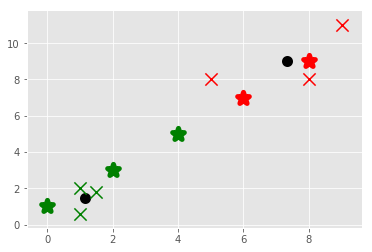

In [244]:
# plot the centroids
for centroid in aaa.centroids:
    plt.scatter(aaa.centroids[centroid][0],aaa.centroids[centroid][1],marker="o",color="k",linewidths=5)
# plot the classified data
for classification in aaa.classifications: #color = color for scatter parameter wont work?????
    color = colorss[classification]
    for featureset in aaa.classifications[classification]:
        plt.scatter(featureset[0],featureset[1],marker="x",color=color,s=150,linewidths=5)

unknows = np.arange(10).reshape((5, 2))
print(unknows)
for unknow in unknows:
    classification = aaa.predict(unknow)
    plt.scatter(unknow[0],unknow[1],marker="*",color=colorss[classification],s=150,linewidths=5)
plt.show()

In [201]:
# example of deep copy and shallow copy
xx = {0: [1., 2.], 1: [1.5, 1.8]}
yy = dict(xx)
yy[0].append([2,2])
print(xx, yy)
import copy
zz = copy.deepcopy(xx)
zz[0].append([3,3])
xx,yy,zz

{0: [1.0, 2.0, [2, 2]], 1: [1.5, 1.8]} {0: [1.0, 2.0, [2, 2]], 1: [1.5, 1.8]}


({0: [1.0, 2.0, [2, 2]], 1: [1.5, 1.8]},
 {0: [1.0, 2.0, [2, 2]], 1: [1.5, 1.8]},
 {0: [1.0, 2.0, [2, 2], [3, 3]], 1: [1.5, 1.8]})

In [233]:
# test tolerance-practise, suggest ABS as comment in the youtube video
# mutiply 100 for percentage of change
x = np.array([1.5,2.5])
y = np.array([0.9995, 0.9991])
print(y-x,np.sum(y-x))
print((y-x)/x,np.sum((y-x)/x))
print(abs((y-x)/x),np.sum(abs((y-x)/x)*100))

[-0.5005 -1.5009] -2.0014000000000003
[-0.33366667 -0.60036   ] -0.9340266666666666
[0.33366667 0.60036   ] 93.40266666666666


In [26]:
clf = KMeans(n_clusters=3)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
centroids = clf.cluster_centers_
labels = clf.labels_
print(centroids)
print(labels)

[[ 1.16666667  1.46666667]
 [ 6.5         8.        ]
 [ 9.         11.        ]]
[0 0 1 1 0 2]


In [28]:
colors = 10*["g.","r.","c.","b.","k."]

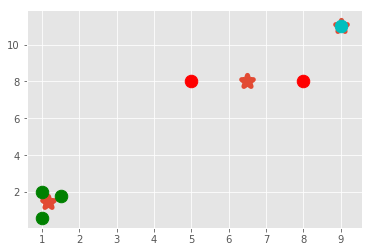

In [29]:
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 25) #plot scatter usage and difference??????

plt.scatter(centroids[:,0], centroids[:,1],s = 150, marker = '*', linewidths = 5)
plt.show()
               